In [4]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

def extract_features(audio_path):
    y, sr = librosa.load(audio_path)
    # Spectrogram
    S = librosa.stft(y)
    S_db = librosa.amplitude_to_db(abs(S))
    
    # Mel-spectrogram
    mel_spec = librosa.feature.melspectrogram(y=y, sr=sr)
    mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)
    
    # Harmonic and Percussive components
    y_harmonic, y_percussive = librosa.effects.hpss(y)
    
    # Tempo
    tempo, _ = librosa.beat.beat_track(y=y, sr=sr)
    
    # Chroma
    chroma = librosa.feature.chroma_cqt(y=y_harmonic, sr=sr)
    
    # MFCCs
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    
    return S_db, mel_spec_db, chroma, mfccs, tempo, sr

# Example usage
audio_path = '/home/mszawerd/Learn/thesis/musical-generative-models-conditioning/data/experiments/test/data/7e04bbc0-0fdd-11ef-acca-77deab4f1957.wav'
spectrogram, mel_spectrogram, chroma, mfccs, tempo, sr = extract_features(audio_path)

/home/mszawerd/.cache/pypoetry/virtualenvs/audiocraft-lab-6l28rSmK-py3.10/lib/python3.10/site-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=690
  warnings.warn(
/home/mszawerd/.cache/pypoetry/virtualenvs/audiocraft-lab-6l28rSmK-py3.10/lib/python3.10/site-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=345
  warnings.warn(


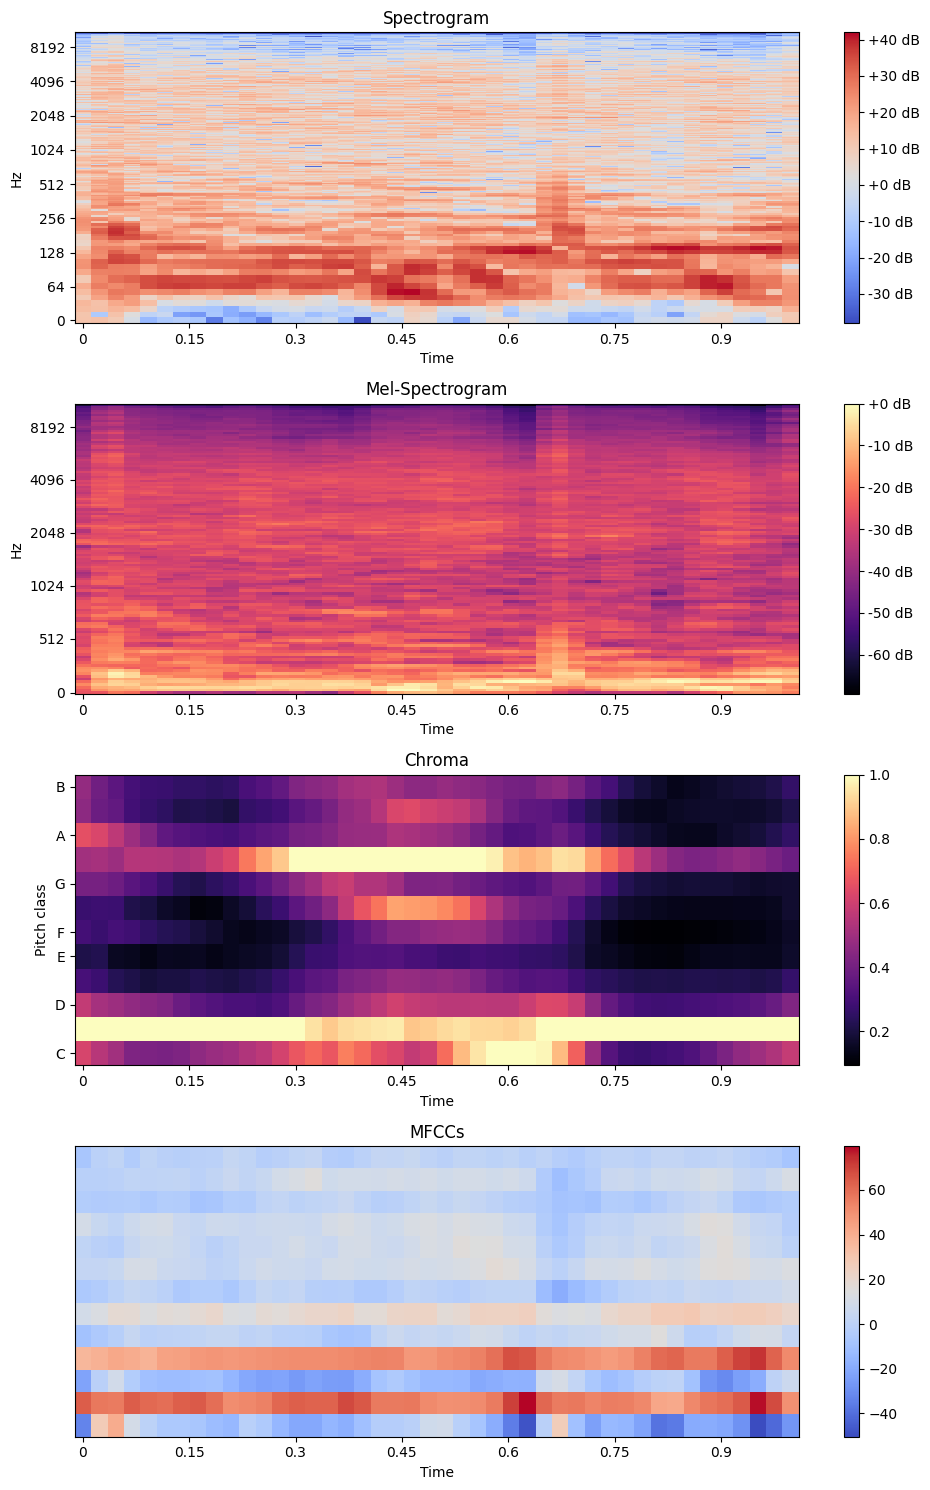

In [5]:
def plot_features(S_db, mel_spectrogram, chroma, mfccs):
    plt.figure(figsize=(10, 15))

    # Plot spectrogram
    plt.subplot(4, 1, 1)
    librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Spectrogram')

    # Plot Mel-spectrogram
    plt.subplot(4, 1, 2)
    librosa.display.specshow(mel_spectrogram, sr=sr, x_axis='time', y_axis='mel')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Mel-Spectrogram')

    # Plot Chroma
    plt.subplot(4, 1, 3)
    librosa.display.specshow(chroma, x_axis='time', y_axis='chroma')
    plt.colorbar()
    plt.title('Chroma')

    # Plot MFCCs
    plt.subplot(4, 1, 4)
    librosa.display.specshow(mfccs, x_axis='time')
    plt.colorbar()
    plt.title('MFCCs')

    plt.tight_layout()
    plt.show()

# Example usage
plot_features(spectrogram, mel_spectrogram, chroma, mfccs)